In [1]:
# Fixing Outliers using IQR method 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import iqr
%matplotlib inline
plt.style.use('ggplot')

In [5]:
# Uploading imputed data to df from CSV WorkingDataFrame
df = pd.read_csv('WorkingDataFrame2', index_col=0)

In [6]:
target = df.iloc[:,:7]
target2 = df.iloc[:,19:21]
targets = pd.concat([target, target2], axis=1, join_axes=[df.index])
df = df.drop(['I1','I2','I3','P_IPO','P_H','P_L','P_1DAY','Y1','Y2'], axis=1)
df.head(15)

,C1,C2,C4,C7,T1,T2,T3,T4,T5,S1,S2,S3,C3',C5',C6'
0,122.0,1.0,0.029074,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,1,3.864345,11.111111
1,259.0,0.0,-0.013352,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,0,12.028832,0.000000
2,90.0,1.0,0.020715,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,0,3.369134,0.000000
3,209.0,1.0,0.020023,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,0,3.299697,0.000000
4,80.0,1.0,-0.034895,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,1,3.726269,5.000000
5,94.0,1.0,-0.057556,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0,1,5.724394,0.000000
6,128.0,1.0,0.004106,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0,0,3.463095,0.000000
7,91.0,0.0,0.040620,103.833,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0,0,2.421469,0.000000
8,100.0,1.0,-0.029316,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0,0,4.816591,0.000000
9,106.0,1.0,-0.024925,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0,1,3.056608,0.000000


In [7]:
# Checking mean of columns BEFORE fixing outliers 
df.mean()

C1       148.350440
C2         0.863636
C4         0.007342
C7       458.587321
T1       465.602639
T2     12757.560117
T3     11394.948680
T4       294.331378
T5       679.139296
S1        68.409091
S2       120.074780
S3       144.743402
C3'        0.529326
C5'        4.625317
C6'        5.282669
dtype: float64

In [8]:
# Defining functin to replace outliers using IQR of each column
def outlier_replace(x): 
    if x > (Q3 + (1.5*IQR)): 
        x = Q3
    elif x < (Q1 - (1.5*IQR)): 
        x = Q1
    else: 
        pass
    return(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa0efcc50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa0f12320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa0efcb00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0f129b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0f12cf8>],
 'means': []}

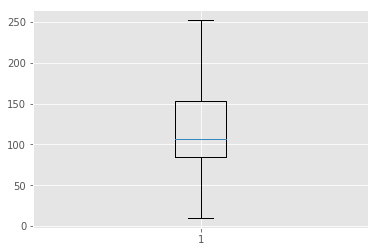

In [9]:
Q1 = df['C1'].quantile(0.25)
Q3 = df['C1'].quantile(0.75)
IQR = iqr(df['C1'])
df['C1'] = df['C1'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['C1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa3043940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa3043fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa30437f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0e7d6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0e7d9e8>],
 'means': []}

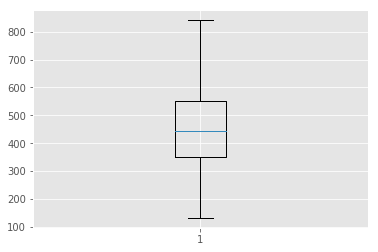

In [10]:
Q1 = df['T1'].quantile(0.25)
Q3 = df['T1'].quantile(0.75)
IQR = iqr(df['T1'])
df['T1'] = df['T1'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['T1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa0e58cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa0e63390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa0e58b70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0e63a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0e63d68>],
 'means': []}

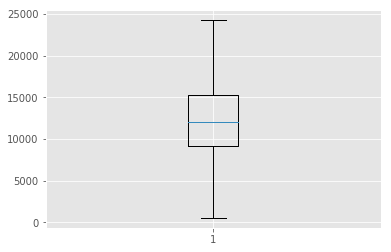

In [11]:
Q1 = df['T2'].quantile(0.25)
Q3 = df['T2'].quantile(0.75)
IQR = iqr(df['T2'])
df['T2'] = df['T2'].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['T2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa0dc0128>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa0dc07b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa0db5f98>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0dc0e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0dcc1d0>],
 'means': []}

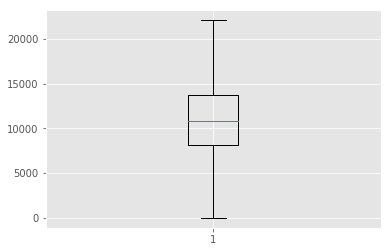

In [12]:
Q1 = df['T3'].quantile(0.25)
Q3 = df['T3'].quantile(0.75)
IQR = iqr(df['T3'])
df['T3'] = df['T3'].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['T3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa0d91da0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa0d9e470>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa0d91c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0d9eb00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0d9ee48>],
 'means': []}

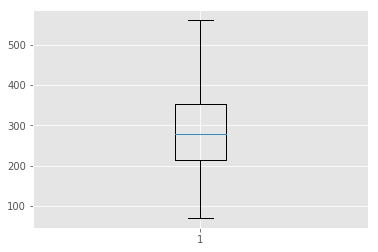

In [13]:
Q1 = df['T4'].quantile(0.25)
Q3 = df['T4'].quantile(0.75)
IQR = iqr(df['T4'])
df['T4'] = df['T4'].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['T4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa0d709b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa0cf8080>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa0d70860>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0cf8710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0cf8a58>],
 'means': []}

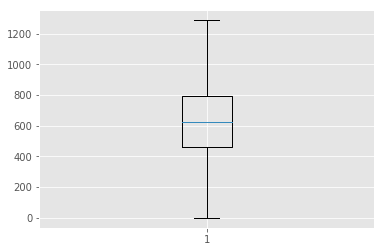

In [14]:
Q1 = df['T5'].quantile(0.25)
Q3 = df['T5'].quantile(0.75)
IQR = iqr(df['T5'])
df['T5'] = df['T5'].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['T5'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa0cd2048>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa0cd26d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa0ccaeb8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0cd2d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0cdd0f0>],
 'means': []}

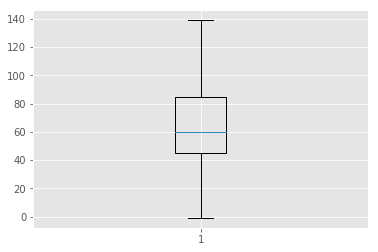

In [15]:
Q1 = df['S1'].quantile(0.25)
Q3 = df['S1'].quantile(0.75)
IQR = iqr(df['S1'])
df['S1'] = df['S1'].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['S1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa0cb0be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa0c3a2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa0cb0a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0c3a940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0c3ac88>],
 'means': []}

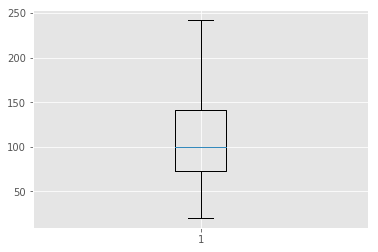

In [16]:
Q1 = df['S2'].quantile(0.25)
Q3 = df['S2'].quantile(0.75)
IQR = iqr(df['S2'])
df['S2'] = df['S2'].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['S2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa0c087f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa0c08e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa0c086a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0c13550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0c13898>],
 'means': []}

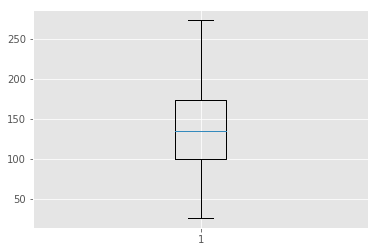

In [17]:
Q1 = df['S3'].quantile(0.25)
Q3 = df['S3'].quantile(0.75)
IQR = iqr(df['S3'])
df['S3'] = df['S3'].apply(lambda x: outlier_replace(x))

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df['S3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa0be6400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa0be6a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa0be62b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0bf0160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0bf04a8>],
 'means': []}

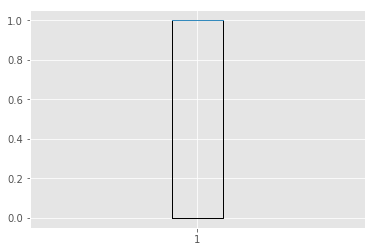

In [18]:
Q1 = df["C3'"].quantile(0.25)
Q3 = df["C3'"].quantile(0.75)
IQR = iqr(df["C3'"])
df["C3'"] = df["C3'"].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["C3'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa0b40550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa0b40be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa0b40400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0b482b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0b485f8>],
 'means': []}

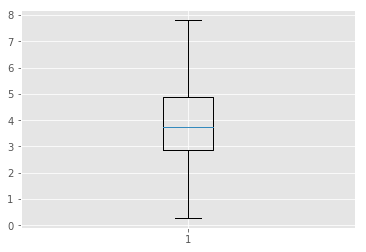

In [19]:
Q1 = df["C5'"].quantile(0.25)
Q3 = df["C5'"].quantile(0.75)
IQR = iqr(df["C5'"])
df["C5'"] = df["C5'"].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["C5'"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fa0b26470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fa0b26b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0fa0b26320>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0fa0ab11d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0fa0ab1518>],
 'means': []}

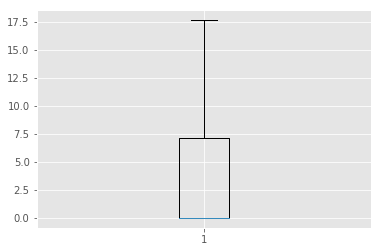

In [20]:
Q1 = df["C6'"].quantile(0.25)
Q3 = df["C6'"].quantile(0.75)
IQR = iqr(df["C6'"])
df["C6'"] = df["C6'"].apply(lambda x: outlier_replace(x)) 

# Checking Outliers Replacement with Boxplot 
plt.boxplot(df["C6'"])

In [21]:
df.mean()

C1       115.363270
C2         0.863636
C4         0.007342
C7       458.587321
T1       453.083944
T2     12323.651760
T3     11029.791056
T4       286.377566
T5       638.549853
S1        64.266129
S2       106.897727
S3       137.508798
C3'        0.529326
C5'        3.853964
C6'        3.328752
dtype: float64

In [22]:
# Exporting DataFrame as CSV 
df.to_csv('OutlierFix2', ',')

In [23]:
targets.to_csv('Targets2', ',')